In [18]:
import datetime
import matplotlib.pyplot as plt
plt.style.use('bmh')
import numpy as np
import pandas as pd
import pandas_datareader.data as pdd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [19]:
stock_symbol = "AMZN"

In [20]:
#直近1年間の株価を取得するために、今日の日付からtimedeltaで１年間ずらしたデータを生成
today = datetime.datetime.today()
before_y = today - datetime.timedelta(days= 365)

#その後変数の可読性を上げるため変数名を変更
start_date, end_date =before_y, today
financial_data = pd.DataFrame()
financial_data[stock_symbol] = pdd.DataReader(stock_symbol, data_source='yahoo', start = start_date, end = end_date)['Adj Close'] 
financial_data

,AMZN
Date,
2019-09-06,1833.510010
2019-09-09,1831.349976
2019-09-10,1820.550049
2019-09-11,1822.989990
2019-09-12,1843.550049
...,...
2020-08-31,3450.959961
2020-09-01,3499.120117
2020-09-02,3531.449951


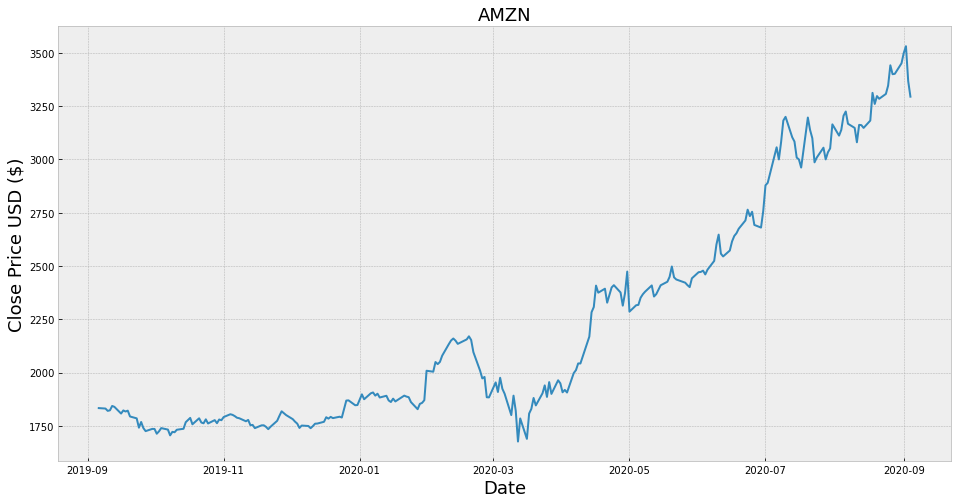

In [7]:
plt.figure(figsize=(16,8))
plt.title(f'{stock_symbol}', fontsize = 18)
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(financial_data[stock_symbol])
plt.show()

In [22]:
#25日後の株価を予測する
future_days = 25
#将来の「x」日を予測する変数を作成
financial_data['Prediction'] = financial_data[[stock_symbol]].shift(-future_days)
#直近4日のデータをみる
financial_data.tail(4)

,AMZN,Prediction
Date,,
2020-09-01,3499.120117,NaN
2020-09-02,3531.449951,NaN
2020-09-03,3368.000000,NaN
2020-09-04,3294.620117,NaN


In [24]:
#説明変数となるデータセットを作成し出力
X = np.array(financial_data.drop(['Prediction'], 1))[:-future_days]
print(X)

[[1833.51000977]
 [1831.34997559]
 [1820.55004883]
 [1822.98999023]
 [1843.55004883]
 [1839.33996582]
 [1807.83996582]
 [1822.55004883]
 [1817.45996094]
 [1821.5       ]
 [1794.16003418]
 [1785.30004883]
 [1741.60998535]
 [1768.32995605]
 [1739.83996582]
 [1725.44995117]
 [1735.91003418]
 [1735.65002441]
 [1713.22998047]
 [1724.42004395]
 [1739.65002441]
 [1732.66003418]
 [1705.51000977]
 [1721.98999023]
 [1720.26000977]
 [1731.92004395]
 [1736.43005371]
 [1767.38000488]
 [1777.43005371]
 [1787.47998047]
 [1757.51000977]
 [1785.66003418]
 [1765.72998047]
 [1762.17004395]
 [1780.7800293 ]
 [1761.32995605]
 [1777.07995605]
 [1762.70996094]
 [1779.98999023]
 [1776.66003418]
 [1791.43994141]
 [1804.66003418]
 [1801.70996094]
 [1795.77001953]
 [1788.19995117]
 [1785.88000488]
 [1771.65002441]
 [1778.        ]
 [1753.10998535]
 [1754.59997559]
 [1739.48999023]
 [1752.5300293 ]
 [1752.79003906]
 [1745.5300293 ]
 [1734.70996094]
 [1745.7199707 ]
 [1773.83996582]
 [1796.93994141]
 [1818.5100097

In [25]:
#目的変数となるデータセットを作成し出力
y = np.array(financial_data['Prediction'])[:-future_days]
print(y)

[1731.92004395 1736.43005371 1767.38000488 1777.43005371 1787.47998047
 1757.51000977 1785.66003418 1765.72998047 1762.17004395 1780.7800293
 1761.32995605 1777.07995605 1762.70996094 1779.98999023 1776.66003418
 1791.43994141 1804.66003418 1801.70996094 1795.77001953 1788.19995117
 1785.88000488 1771.65002441 1778.         1753.10998535 1754.59997559
 1739.48999023 1752.5300293  1752.79003906 1745.5300293  1734.70996094
 1745.7199707  1773.83996582 1796.93994141 1818.51000977 1800.80004883
 1781.59997559 1769.95996094 1760.68994141 1740.47998047 1751.59997559
 1749.51000977 1739.20996094 1748.7199707  1760.32995605 1760.93994141
 1769.20996094 1790.66003418 1784.0300293  1792.2800293  1786.5
 1793.         1789.20996094 1868.77001953 1869.80004883 1846.89001465
 1847.83996582 1898.01000977 1874.9699707  1902.88000488 1906.85998535
 1891.9699707  1901.05004883 1883.16003418 1891.30004883 1869.43994141
 1862.02001953 1877.93994141 1864.7199707  1892.         1887.45996094
 1884.57995605

In [26]:
#75％の訓練データと25％のテストデータに分割
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [33]:
#決定木モデルを作成
tree = DecisionTreeRegressor().fit(x_train, y_train)

In [34]:
#将来を予測するデータを取得
#最後の 'x'日を除く元のデータセットからのすべての行
x_future = financial_data.drop(['Prediction'], 1)[:-future_days]
#最後の 'x'行を取得
x_future = x_future.tail(future_days) 
#データセットをnumpy配列に変換
x_future = np.array(x_future)
x_future

array([[2692.87011719],
       [2680.37988281],
       [2758.82006836],
       [2878.69995117],
       [2890.30004883],
       [3057.04003906],
       [3000.12011719],
       [3081.11010742],
       [3182.62988281],
       [3200.        ],
       [3104.        ],
       [3084.        ],
       [3008.87011719],
       [2999.89990234],
       [2961.9699707 ],
       [3196.84008789],
       [3138.29003906],
       [3099.90991211],
       [2986.55004883],
       [3008.90991211],
       [3055.20996094],
       [3000.33007812],
       [3033.5300293 ],
       [3051.87988281],
       [3164.67993164]])

In [35]:
#モデルツリーの予測を表示
tree_prediction = tree.predict(x_future)
print(tree_prediction)

[3111.88989258 3138.83007812 3205.0300293  3225.         3167.45996094
 3148.15991211 3499.12011719 3162.23999023 3161.02001953 3148.02001953
 3182.40991211 3312.48999023 3260.47998047 3297.37011719 3284.7199707
 3307.45996094 3346.48999023 3441.85009766 3400.         3401.80004883
 3148.15991211 3499.12011719 3531.44995117 3368.         3294.62011719]



C:\Users\densu\anaconda3\envs\numpyenv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


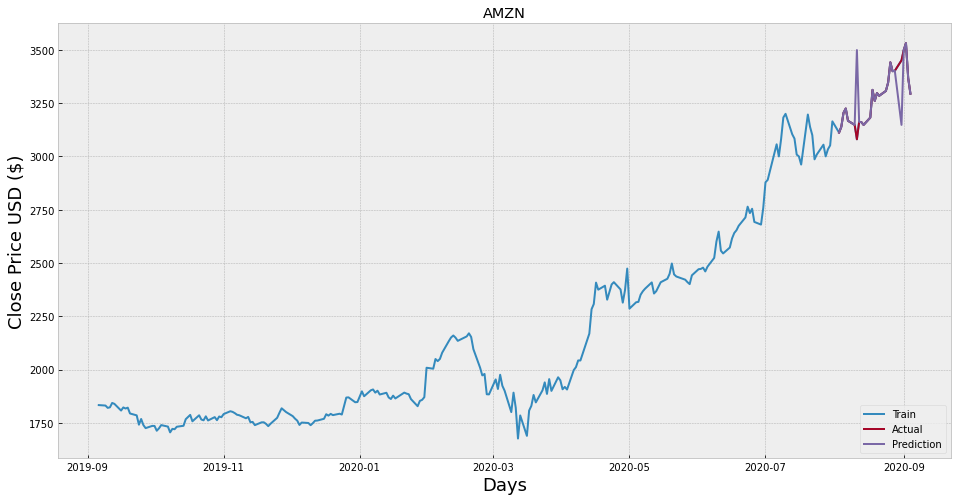

In [36]:
#決定木分析による予測モデルを作成
predictions = tree_prediction
#データをプロット
valid =  financial_data[X.shape[0]:]
#予測価格を保持する「予測」という新しい列を作成
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title(f'{stock_symbol}')
plt.xlabel('Days',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(financial_data[stock_symbol])
plt.plot(valid[[stock_symbol,'Predictions']])

plt.legend(['Train', 'Actual', 'Prediction' ], loc='lower right')
plt.show()